In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


data1 = pd.read_excel('Shear_Wall_Database.xlsx', sheet_name='Database')
data1.head()

,Unnamed: 0,Author,Specimen,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,Lefas et al. (1990a),SW11,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,2,Lefas et al. (1990a),SW12,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,3,Lefas et al. (1990a),SW13,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,4,Lefas et al. (1990a),SW14,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,5,Lefas et al. (1990a),SW15,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [3]:
data=data1.loc[:, 'FailureMode':'Ab/Ag']
data.head()

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [4]:
print(data.shape)


(393, 10)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FailureMode  393 non-null    int64  
 1   M/Vlw        393 non-null    float64
 2   lw/tw        393 non-null    float64
 3   ρvwFy,vw/fc  393 non-null    float64
 4   ρhwFy,vw/fc  393 non-null    float64
 5   ρvcFy,vc/fc  393 non-null    float64
 6   ρhcFy,hc/fc  393 non-null    float64
 7   P/fcAg       393 non-null    float64
 8   Section      393 non-null    object 
 9   Ab/Ag        393 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 30.8+ KB
None


In [6]:
print(data['Section'].unique())


['R' 'B' 'F']


In [7]:
print(data.groupby('Section').size())

Section
B     95
F     60
R    238
dtype: int64


In [8]:
data_mod_lc = data.copy()
data_mod_lc['Section'] = data_mod_lc['Section'].astype('category')
#print(cat_bird_lc.dtypes)
data_mod_lc['Section'] = data_mod_lc['Section'].cat.codes
data_mod_lc.head(10)

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.100000,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.100000,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.100000,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.100000,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.100000,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0
5,1,1.100000,10.714286,0.271999,0.138298,0.352273,0.150870,0.211845,2,0.0
6,1,1.100000,10.714286,0.291146,0.049793,0.401398,0.161491,0.000000,2,0.0
7,1,2.115385,10.000000,0.342420,0.121495,0.452979,0.136682,0.000000,2,0.0
8,1,2.115385,10.000000,0.290267,0.102767,0.383152,0.115613,0.106415,2,0.0
9,1,2.115385,10.000000,0.307270,0.108787,0.405596,0.122385,0.212300,2,0.0


In [9]:
data['Section'] = data_mod_lc['Section']
data.head()

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0


In [10]:
c = data_mod_lc.Section.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

{0: 0, 1: 1, 2: 2}


In [11]:
data.isnull().sum()


FailureMode    0
M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Section        0
Ab/Ag          0
dtype: int64

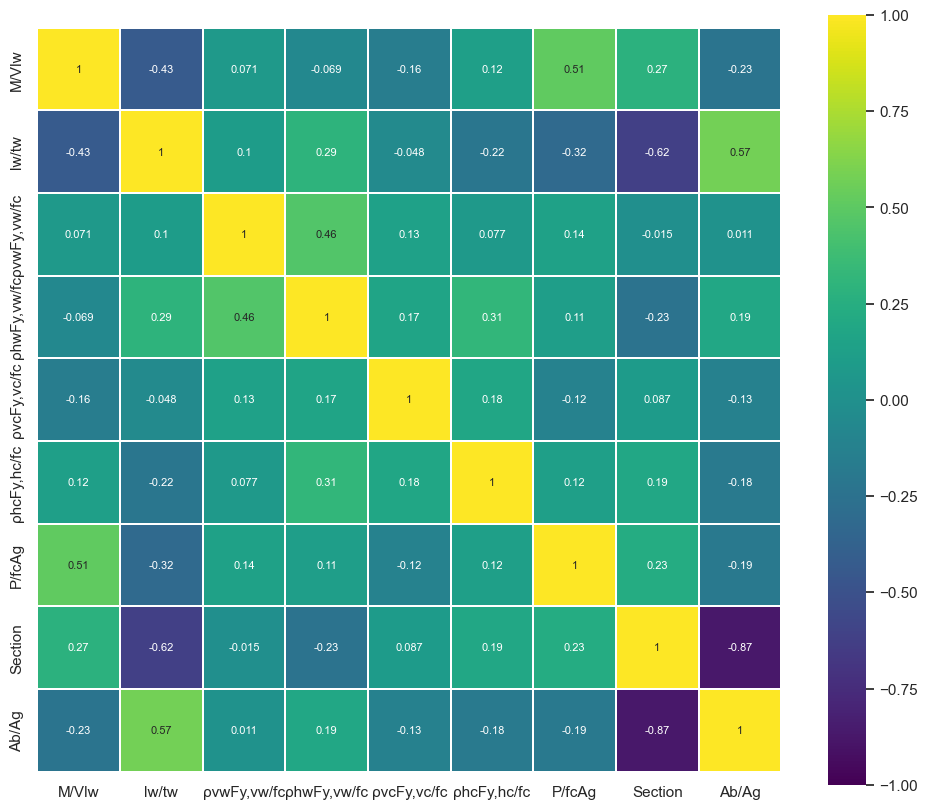

In [12]:
corr = data.drop('FailureMode', axis=1).corr() # examining correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

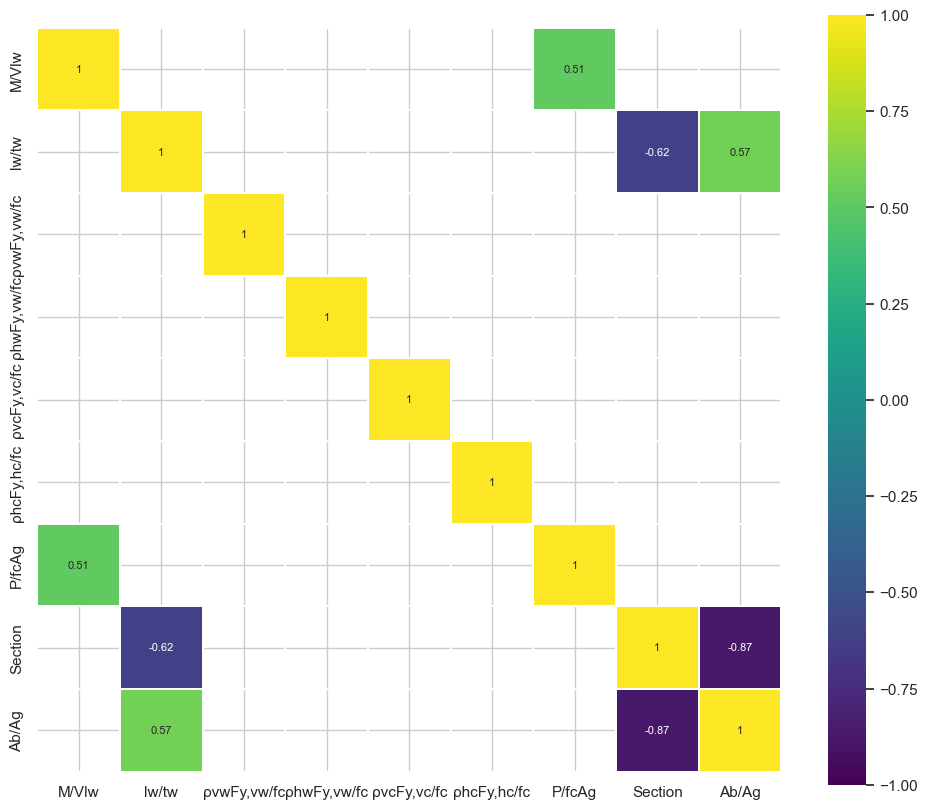

In [14]:

corr = data.drop('FailureMode', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [15]:
features = list(data.columns.values)
print(features)

['FailureMode', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag']


C:\Users\THARUN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


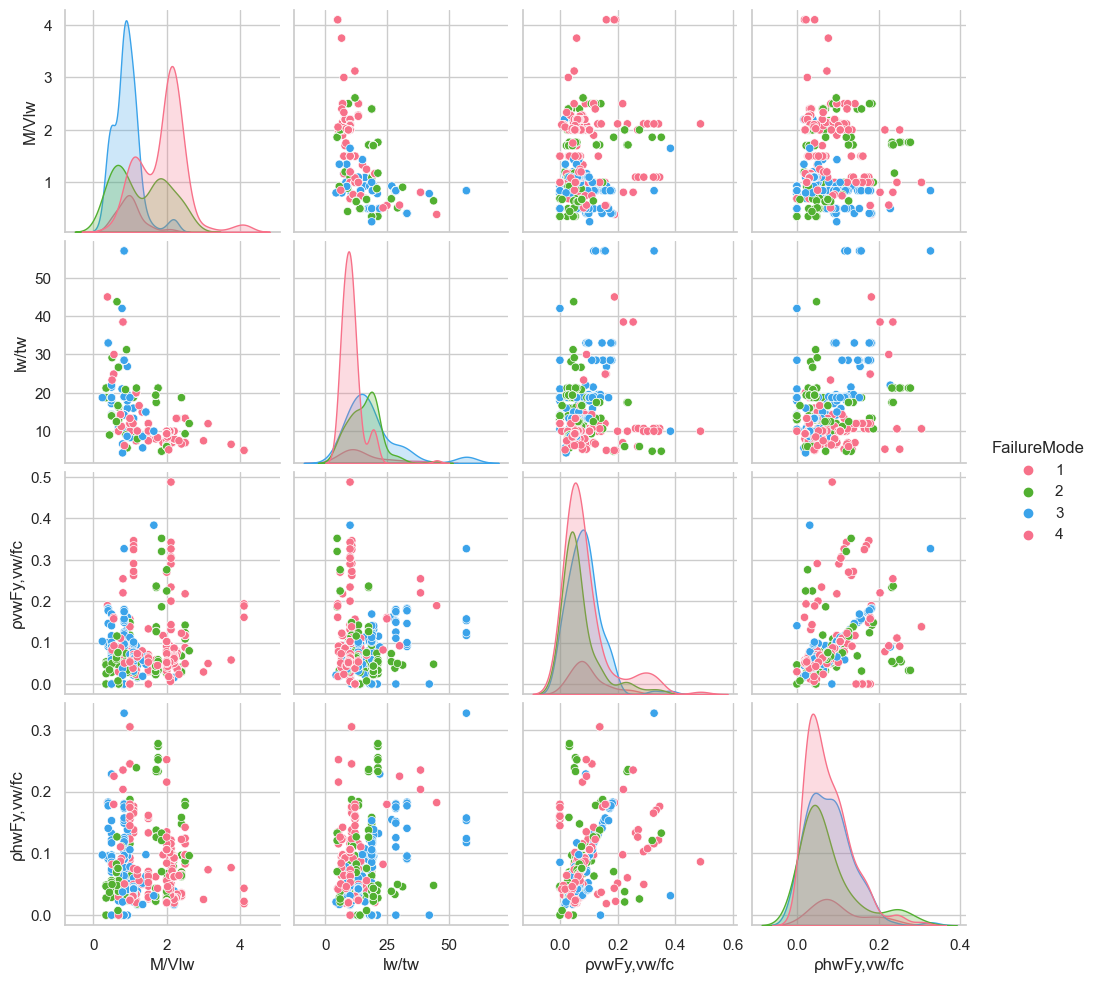

In [16]:
import seaborn as sns

quantitative_features_list1 = ['FailureMode', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="FailureMode", palette="husl")

C:\Users\THARUN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


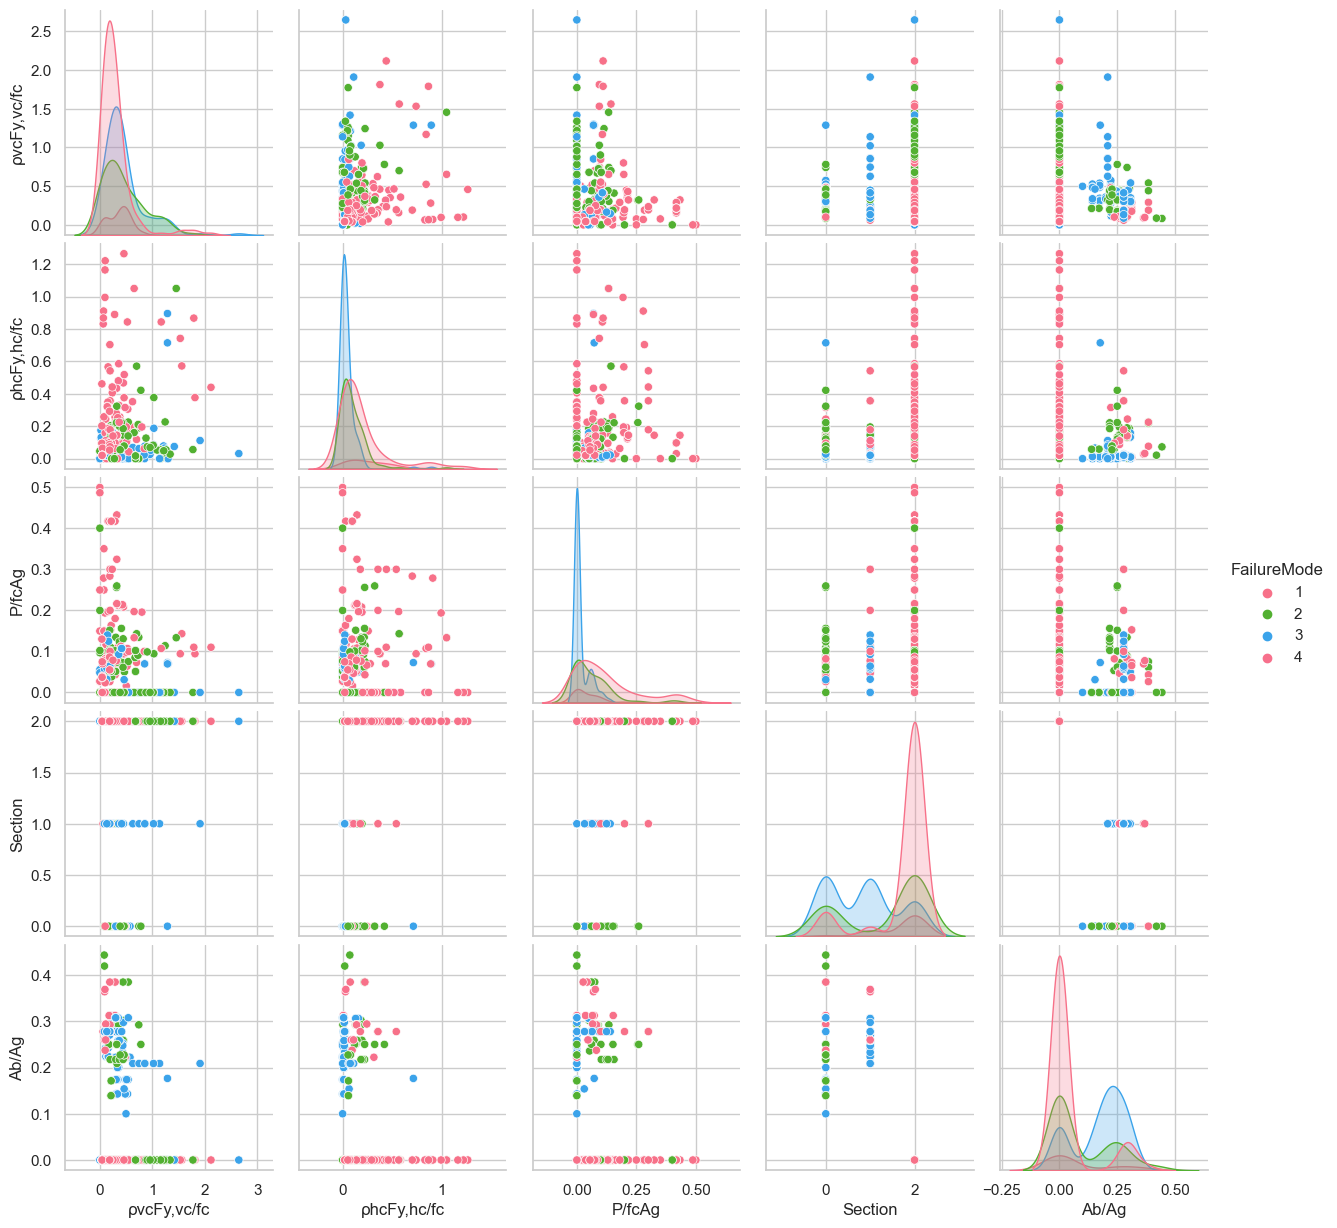

In [17]:
import seaborn as sns

quantitative_features_list1 = ['FailureMode', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="FailureMode", palette="husl")

Text(0, 0.5, 'Failure Mode')

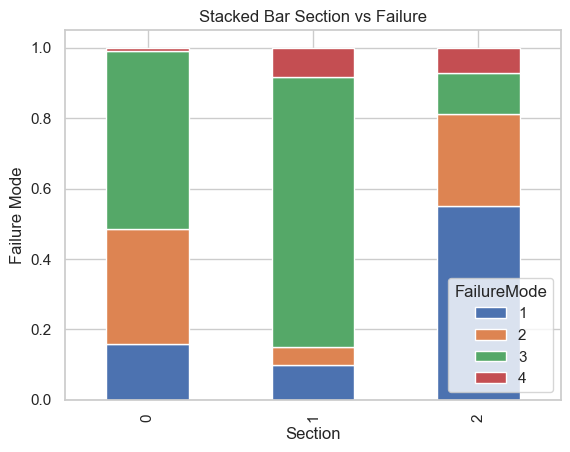

In [18]:
table=pd.crosstab(data.Section,data.FailureMode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Section vs Failure')
plt.xlabel('Section')
plt.ylabel('Failure Mode')

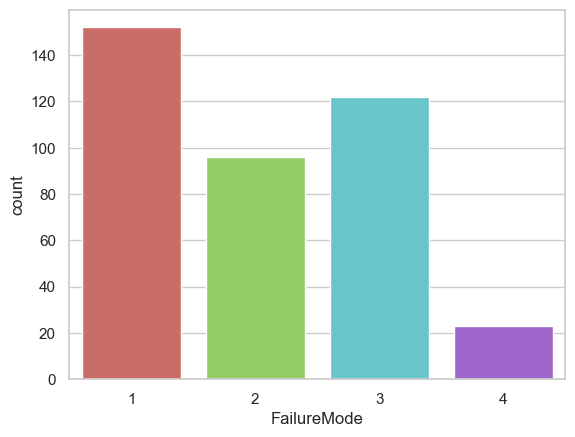

In [19]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='FailureMode',data=data, palette='hls')
plt.show()

In [20]:
data = pd.get_dummies(data = data , columns=['Section'] )
data.head()

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,Section_0,Section_1,Section_2
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,False,False,True
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,False,False,True
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,False,False,True
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,False,False,True
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,False,False,True


In [21]:
X = data.loc[:, data.columns != 'FailureMode']
y=data['FailureMode']
X.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,Section_0,Section_1,Section_2
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,False,False,True
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,False,False,True
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,False,False,True
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,False,False,True
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,False,False,True


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FailureMode, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.76


In [28]:
y_pred_train = gnb.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[82 17  5  2]
 [15 39 12  0]
 [ 2 20 61  1]
 [ 4  3  5  7]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78       106
           2       0.49      0.59      0.54        66
           3       0.73      0.73      0.73        84
           4       0.70      0.37      0.48        19

    accuracy                           0.69       275
   macro avg       0.68      0.61      0.63       275
weighted avg       0.70      0.69      0.69       275



In [30]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38  4  3  1]
 [ 6 21  3  0]
 [ 2  5 30  1]
 [ 1  1  1  1]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82        46
           2       0.68      0.70      0.69        30
           3       0.81      0.79      0.80        38
           4       0.33      0.25      0.29         4

    accuracy                           0.76       118
   macro avg       0.66      0.64      0.65       118
weighted avg       0.76      0.76      0.76       118



In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.85


In [33]:
y_pred_train = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[96  5  3  2]
 [15 46  5  0]
 [ 4  8 72  0]
 [ 4  3  6  6]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.81      0.91      0.85       106
           2       0.74      0.70      0.72        66
           3       0.84      0.86      0.85        84
           4       0.75      0.32      0.44        19

    accuracy                           0.80       275
   macro avg       0.78      0.69      0.72       275
weighted avg       0.80      0.80      0.79       275



In [35]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43  1  0  2]
 [ 7 20  3  0]
 [ 1  3 34  0]
 [ 0  0  1  3]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.93      0.89        46
           2       0.83      0.67      0.74        30
           3       0.89      0.89      0.89        38
           4       0.60      0.75      0.67         4

    accuracy                           0.85       118
   macro avg       0.79      0.81      0.80       118
weighted avg       0.85      0.85      0.84       118



In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


In [38]:
y_pred_train = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [40]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[37  6  3  0]
 [ 5 21  1  3]
 [ 4  1 32  1]
 [ 0  0  0  4]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        46
           2       0.75      0.70      0.72        30
           3       0.89      0.84      0.86        38
           4       0.50      1.00      0.67         4

    accuracy                           0.80       118
   macro avg       0.74      0.84      0.77       118
weighted avg       0.81      0.80      0.80       118



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



RF = RandomForestClassifier(n_estimators=200,  random_state=0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.86


In [43]:
y_pred_train = RF.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [44]:
y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43  2  0  1]
 [ 5 21  3  1]
 [ 2  2 34  0]
 [ 0  0  0  4]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.93      0.90        46
           2       0.84      0.70      0.76        30
           3       0.92      0.89      0.91        38
           4       0.67      1.00      0.80         4

    accuracy                           0.86       118
   macro avg       0.82      0.88      0.84       118
weighted avg       0.87      0.86      0.86       118



In [46]:
RF.feature_importances_


array([0.19314531, 0.13153915, 0.09183167, 0.09759066, 0.1397623 ,
       0.13749226, 0.06990941, 0.07369148, 0.00996661, 0.01949359,
       0.03557756])

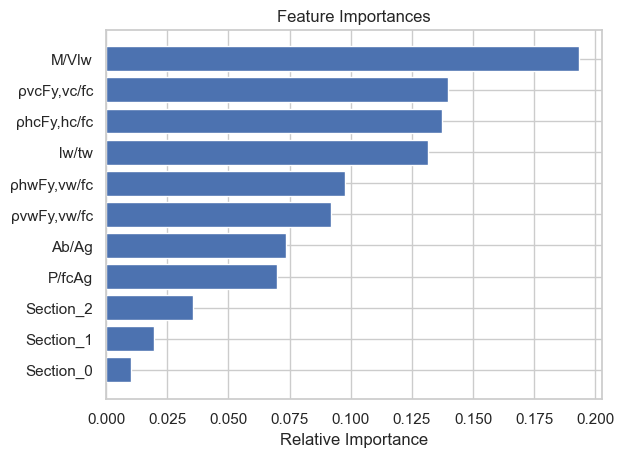

In [47]:
features = list(X.columns.values)

importances = RF.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\THARUN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
410 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
183 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\THARUN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\THARUN\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\THARUN\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\THARUN\anaconda3\Lib\site-

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [66]:
# Initialize the RandomForestClassifier with correct parameters
RF1 = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,  # Replacing 'auto' with None
    max_depth=50,
    bootstrap=False  # Correct usage
)

# Fit the model to the training data
RF1.fit(X_train, y_train)

# Print accuracy on training and test sets
print('Accuracy of RF classifier on training set: {:.2f}'.format(RF1.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(RF1.score(X_test, y_test)))


Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.81


In [67]:
y_pred_train = RF1.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [68]:
y_pred = RF1.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[37  8  1  0]
 [ 4 22  1  3]
 [ 4  1 32  1]
 [ 0  0  0  4]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81        46
           2       0.71      0.73      0.72        30
           3       0.94      0.84      0.89        38
           4       0.50      1.00      0.67         4

    accuracy                           0.81       118
   macro avg       0.74      0.84      0.77       118
weighted avg       0.82      0.81      0.81       118



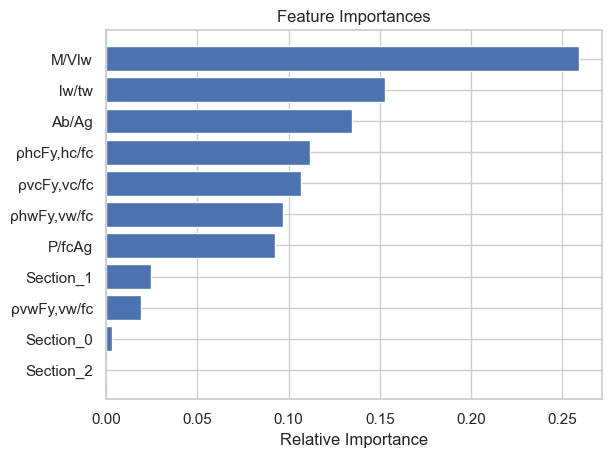

In [70]:
RF1.feature_importances_
features = list(X.columns.values)

importances = RF1.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ADB = AdaBoostClassifier(n_estimators=100, random_state=0)
ADB.fit(X_train, y_train)
print('Accuracy of ADB classifier on training set: {:.2f}'
     .format(ADB.score(X_train, y_train)))
print('Accuracy of ADB classifier on test set: {:.2f}'
     .format(ADB.score(X_test, y_test)))

Accuracy of ADB classifier on training set: 0.76
Accuracy of ADB classifier on test set: 0.67


In [72]:
y_pred_train = ADB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[85 17  4  0]
 [13 46  6  1]
 [ 7 13 62  2]
 [ 0  2  2 15]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.81      0.80      0.81       106
           2       0.59      0.70      0.64        66
           3       0.84      0.74      0.78        84
           4       0.83      0.79      0.81        19

    accuracy                           0.76       275
   macro avg       0.77      0.76      0.76       275
weighted avg       0.77      0.76      0.76       275



In [74]:
y_pred = ADB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[36  6  1  3]
 [ 9 15  5  1]
 [ 4  8 26  0]
 [ 0  2  0  2]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.78      0.76        46
           2       0.48      0.50      0.49        30
           3       0.81      0.68      0.74        38
           4       0.33      0.50      0.40         4

    accuracy                           0.67       118
   macro avg       0.59      0.62      0.60       118
weighted avg       0.68      0.67      0.67       118



In [80]:
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

LGB = LGBMClassifier()
LGB.fit(X_train, y_train)
print('Accuracy of LGB classifier on training set: {:.2f}'
     .format(LGB.score(X_train, y_train)))
print('Accuracy of LGB classifier on test set: {:.2f}'
     .format(LGB.score(X_test, y_test)))

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 

In [81]:
y_pred_train = LGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [83]:
y_pred = LGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[39  6  0  1]
 [ 7 21  1  1]
 [ 3  3 32  0]
 [ 0  0  0  4]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82        46
           2       0.70      0.70      0.70        30
           3       0.97      0.84      0.90        38
           4       0.67      1.00      0.80         4

    accuracy                           0.81       118
   macro avg       0.78      0.85      0.81       118
weighted avg       0.82      0.81      0.82       118



In [87]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

CGB = CatBoostClassifier()
CGB.fit(X_train, y_train)
print('Accuracy of CGB classifier on training set: {:.2f}'
     .format(CGB.score(X_train, y_train)))
print('Accuracy of CGB classifier on test set: {:.2f}'
     .format(CGB.score(X_test, y_test)))

Learning rate set to 0.074085
0:	learn: 1.3323109	total: 3.1ms	remaining: 3.1s
1:	learn: 1.2812373	total: 5.51ms	remaining: 2.75s
2:	learn: 1.2414959	total: 8.06ms	remaining: 2.68s
3:	learn: 1.2095460	total: 8.87ms	remaining: 2.21s
4:	learn: 1.1743341	total: 11.2ms	remaining: 2.23s
5:	learn: 1.1384855	total: 13.2ms	remaining: 2.19s
6:	learn: 1.1056940	total: 15.4ms	remaining: 2.19s
7:	learn: 1.0737464	total: 17.4ms	remaining: 2.15s
8:	learn: 1.0440951	total: 19.6ms	remaining: 2.16s
9:	learn: 1.0152944	total: 21.8ms	remaining: 2.16s
10:	learn: 0.9858053	total: 23.9ms	remaining: 2.14s
11:	learn: 0.9629798	total: 25.9ms	remaining: 2.13s
12:	learn: 0.9418299	total: 28.1ms	remaining: 2.13s
13:	learn: 0.9206525	total: 30.2ms	remaining: 2.13s
14:	learn: 0.8987890	total: 32.2ms	remaining: 2.12s
15:	learn: 0.8782639	total: 34.5ms	remaining: 2.12s
16:	learn: 0.8576705	total: 37.1ms	remaining: 2.15s
17:	learn: 0.8404029	total: 39.9ms	remaining: 2.18s
18:	learn: 0.8245464	total: 42.2ms	remaining: 

In [88]:
y_pred_train = CGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[106   0   0   0]
 [  0  66   0   0]
 [  0   0  84   0]
 [  0   0   0  19]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [90]:
y_pred = CGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38  8  0  0]
 [ 5 21  3  1]
 [ 2  2 34  0]
 [ 0  0  0  4]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.83      0.84        46
           2       0.68      0.70      0.69        30
           3       0.92      0.89      0.91        38
           4       0.80      1.00      0.89         4

    accuracy                           0.82       118
   macro avg       0.81      0.86      0.83       118
weighted avg       0.82      0.82      0.82       118



In [92]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
svc = SVC(kernel='linear', random_state=0)  # You can adjust the kernel and other hyperparameters as needed
svc.fit(X_train, y_train)

# Print the accuracy on the training and test sets
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))


Accuracy of SVC classifier on training set: 0.65
Accuracy of SVC classifier on test set: 0.68


In [98]:
from sklearn.metrics import confusion_matrix
y_pred_train = svc.predict(X_train)


confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[98  1  7  0]
 [35 19 12  0]
 [ 8 13 63  0]
 [12  2  5  0]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, zero_division=0))

              precision    recall  f1-score   support

           1       0.64      0.92      0.76       106
           2       0.54      0.29      0.38        66
           3       0.72      0.75      0.74        84
           4       0.00      0.00      0.00        19

    accuracy                           0.65       275
   macro avg       0.48      0.49      0.47       275
weighted avg       0.60      0.65      0.61       275



In [100]:
y_pred = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43  0  3  0]
 [21  6  3  0]
 [ 6  1 31  0]
 [ 2  1  1  0]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.60      0.93      0.73        46
           2       0.75      0.20      0.32        30
           3       0.82      0.82      0.82        38
           4       0.00      0.00      0.00         4

    accuracy                           0.68       118
   macro avg       0.54      0.49      0.47       118
weighted avg       0.69      0.68      0.63       118

